In [1]:
results = []

# KNN
## Feature Selection

In [2]:
import pandas as pd
import numpy as np
import mltools as ml
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_data = pd.read_csv('data/X_train.txt')
Y_data = pd.read_csv('data/Y_train.txt')

# #apply SelectKBest class to extract top 10 best features
X = X_data.iloc[:,:41]
Y = Y_data.iloc[:,-1]

bestfeatures = SelectKBest(score_func=f_regression, k="all" )
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfscores],axis=1)

featureScores.columns = ['Score']  #naming the dataframe columns
df = featureScores.nlargest(3,'Score')
print("Features ordered by Score: ")
top_features = []
for index, row in df.iterrows():
    top_features.append(index)
    print(index, row['Score'])

Features ordered by Score: 
24 72.30120144068351
7 47.62128875145446
28 45.76621928532493


1 0.4033670033670034
2 0.3939393939393939
5 0.38047138047138046
10 0.3744107744107744
50 0.3811447811447811
100 0.37643097643097645
200 0.3925925925925926
Training and validation error as a function of K:


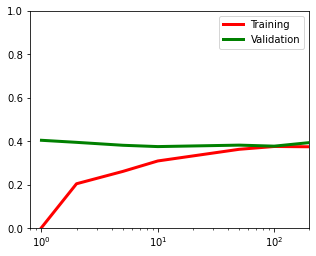

In [3]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt 

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
Xa = []
for a in top_features:
    Xa.append(X[:,a])


X,Y=ml.shuffleData(X,Y)
X,_=ml.transforms.rescale(X)
Xtr,Xva,Ytr,Yva=ml.splitData(X,Y,.80)
Xtra = []
Xvaa = []
for a in top_features:
    Xtra.append(Xtr[:,a])
    Xvaa.append(Xva[:,a])

    
Xtra = np.asarray(Xtra).T
Xvaa = np.asarray(Xvaa).T

knn = ml.knn.knnClassify(Xtra,Ytr)
k_values = [1,2,5,10,50,100,200]


fig,ax=plt.subplots(1,1,figsize=(5,4))

errTr=np.zeros(len(k_values))
errVa=np.zeros(errTr.shape[0])
# print(Xtra)
for i,k in enumerate(k_values):
    
    knn.train(Xtra,Ytr,K=k)
    YvaHat = knn.predict(Xvaa)

    errTr[i]=knn.err(Xtra,Ytr)
    errVa[i]=knn.err(Xvaa,Yva)
    print(k, knn.err(Xvaa,Yva))
    
ax.semilogx(k_values,errTr,'r-',lw=3,label='Training')
ax.semilogx(k_values,errVa,'g-',lw=3,label='Validation')
ax.legend()
ax.set_xlim(.8,200)
ax.set_ylim(0,1)
print("Training and validation error as a function of K:")
plt.show()

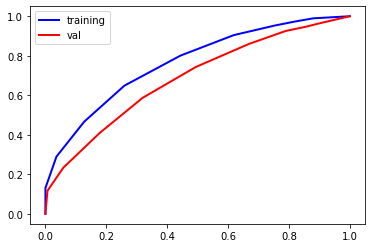

AUC training Area: 0.7702
AUC val Area: 0.6821


In [4]:
learner = ml.knn.knnClassify(Xtra,Ytr) # train a model using training data X,Y
learner.train(Xtra,Ytr,K=10)
fpr, tpr, tnr = learner.roc(Xtra, Ytr) #apply ROC on training data
fpr2, tpr2, tnr2 = learner.roc(Xvaa, Yva) #apply ROC on validation data
plt.plot(fpr, tpr, 'b-', label = "training", linewidth = 2) #plot training 
plt.plot(fpr2, tpr2, 'r-', label = "val", linewidth = 2) #plot validation
plt.legend(fontsize=10, loc=0)
plt.show()


print('AUC training Area: %0.4f' %(learner.auc(Xtra, Ytr)))
print('AUC val Area: %0.4f' %(learner.auc(Xvaa, Yva)))


Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Xtea = []

for a in top_features:
    Xtea.append(Xte[:,a])
Xtea = np.asarray(Xtea).T

In [5]:
results.append(learner.predict(Xtea))

## Random Forests

In [6]:
import pandas as pd
import numpy as np
import mltools as ml
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_data = pd.read_csv('data/X_train.txt')
Y_data = pd.read_csv('data/Y_train.txt')
X_data,_=ml.transforms.rescale(X_data)
X = X_data.iloc[:,:41]
Y = Y_data.iloc[:,-1]


bestfeatures = SelectKBest(f_regression,k="all")
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfscores],axis=1)

featureScores.columns = ['Score']  #naming the dataframe columns
df = featureScores.nlargest(30,'Score')
# print("Non-negative features ordered by Score: ")
top_features = []
for index, row in df.iterrows():
    top_features.append(index)
    # print(index, row['Score'])

X = X_data.iloc[:,:41]
Y = Y_data.iloc[:,-1]

X_new = SelectKBest(f_regression,k=30).fit_transform(X,Y)

Xtr, Xte, Ytr, Yte = train_test_split(X_new,Y,test_size=0.2)

model = RandomForestClassifier(max_depth=11,n_estimators=50, random_state=0)
model.fit(Xtr, Ytr)

print(model.score(Xte, Yte))

Xtes = np.genfromtxt('data/X_test.txt', delimiter=',')
Xtea = []

for a in top_features:
    Xtea.append(Xtes[:,a])
Xtea = np.asarray(Xtea).T


one = 0
pred=model.predict(Xtea)
for i in pred:
    if i == 1:
        one+= 1
print("ones", one)
print("total length", len(pred))
print(pred)

0.6498316498316499
ones 2332
total length 7422
[0. 0. 1. ... 0. 0. 0.]


In [7]:
results.append(model.predict(Xtea))

In [8]:
import pandas as pd
import numpy as np
import mltools as ml
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_data = pd.read_csv('data/X_train.txt')
Y_data = pd.read_csv('data/Y_train.txt')
X_data,_=ml.transforms.rescale(X_data)
X = X_data.iloc[:,41:69]
Y = Y_data.iloc[:,-1]


bestfeatures = SelectKBest(f_classif,k="all")
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfscores],axis=1)

featureScores.columns = ['Score']  #naming the dataframe columns
df = featureScores.nlargest(20,'Score')
# print("Non-negative features ordered by Score: ")
top_features = []
for index, row in df.iterrows():
    top_features.append(index)
    # print(index, row['Score'])

X = X_data.iloc[:,41:69]
Y = Y_data.iloc[:,-1]

X_new = SelectKBest(f_classif,k=20).fit_transform(X,Y)

Xtr, Xte, Ytr, Yte = train_test_split(X_new,Y,test_size=0.2)

model = RandomForestClassifier(max_depth=11,n_estimators=100, random_state=0)
model.fit(Xtr, Ytr)

print(model.score(Xte, Yte))

Xtes = np.genfromtxt('data/X_test.txt', delimiter=',')
Xtea = []

for a in top_features:
    Xtea.append(Xtes[:,a])
Xtea = np.asarray(Xtea).T


one = 0
pred=model.predict(Xtea)
for i in pred:
    if i == 1:
        one+= 1
print("ones", one)
print("total length", len(pred))
print(pred)

0.5723905723905723
ones 3955
total length 7422
[1. 1. 0. ... 0. 1. 1.]


In [9]:
results.append(model.predict(Xtea))

## Neural Networks

In [10]:
import pandas as pd
import numpy as np
import mltools as ml
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from numpy import loadtxt

In [11]:
X_data = pd.read_csv('data/X_train.txt')
Y_data = pd.read_csv('data/Y_train.txt')


scaler = MinMaxScaler()
scaler.fit(X_data)
scaler.transform(X_data)

X = X_data.iloc[:,0:]
Y = Y_data.iloc[:,-1]

bestfeatures = SelectKBest(score_func=f_classif, k="all" )
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfscores],axis=1)

featureScores.columns = ['Score']  #naming the dataframe columns
# Get top 60 features
df = featureScores.nlargest(60,'Score')
top_features = []
for index, row in df.iterrows():
    top_features.append(index)

In [12]:
dataset_x = loadtxt('data/X_train.txt', delimiter=',')
dataset_y = loadtxt('data/Y_train.txt')

X = preprocessing.scale(dataset_x)

top_x = []
for val in top_features:
    top_x.append(X[:,val:val+1])
X = np.hstack(top_x)

Xtr,Xva,Ytr,Yva=ml.splitData(X,dataset_y,.9)

nnet = ml.nnet.nnetClassify() 
nnet.init_weights([Xtr.shape[1],1000,400,2],'random',X,dataset_y);
nnet.train(Xtr,Ytr,stopTol=0.001,initStep=1.0,stopIter=2**15)

print("Neural Network AUC: ",nnet.auc(Xva,Yva))

it 2 : Jsur = 0.5055515629200961, J01 = 0.4955844933393205
it 4 : Jsur = 0.5045454975748955, J01 = 0.4955844933393205
it 8 : Jsur = 0.502102536960838, J01 = 0.4955844933393205
it 16 : Jsur = 0.5252040785555969, J01 = 0.4955844933393205
it 32 : Jsur = 0.5001091249708323, J01 = 0.4955844933393205
it 64 : Jsur = 0.5263056421873219, J01 = 0.5044155066606796
it 128 : Jsur = 0.5003379276627848, J01 = 0.5044155066606796
it 256 : Jsur = 0.5070506968644305, J01 = 0.5044155066606796
it 512 : Jsur = 0.5018363730029011, J01 = 0.5044155066606796
it 1024 : Jsur = 0.5024207005955027, J01 = 0.4955844933393205
it 2048 : Jsur = 0.5015952053151339, J01 = 0.4955844933393205
it 4096 : Jsur = 0.47722093896006695, J01 = 0.4033827271366562
it 8192 : Jsur = 0.46604602581601956, J01 = 0.39320461008831015
it 16384 : Jsur = 0.46124991342243926, J01 = 0.3851219877263883
it 32768 : Jsur = 0.46239905228646366, J01 = 0.38961233348301155
Neural Network AUC:  0.6917175683536939


In [26]:
Xte = loadtxt('data/X_test.txt', delimiter=',')
Xte = preprocessing.scale(Xte)

top_x = []
for val in top_features:
    top_x.append(Xte[:,val:val+1])
Xte = np.hstack(top_x)
Yte = nnet.predictSoft(Xte)[:,1]
for i in range(len(Yte)):
    Yte[i] = 1 if Yte[i] >= 0.5 else 0

#Yte = np.vstack((np.arange(Xte.shape[0]), Yte)).T 
#np.savetxt('Y_neural_network.txt',Yte,'%d, %.2f',header='Id,Predicted',comments='',delimiter=',')

In [27]:
results.append(Yte)

# Putting it together

In [29]:
predict_te = np.zeros((7422,4))

for ct in range(4):
    predict_te[:,ct] = results[ct]

final_predict = []
for i in predict_te:
    final_predict.append(1 if np.mean(i) > 0.5 else 0)

Yte = np.vstack((np.arange(7422),final_predict)).T

np.savetxt('Y_submit2.txt',Yte,'%d,%.2f',header='Id,Predicted',comments='',delimiter=',')